In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

In [6]:
data = pd.read_csv('output_lower.csv')
data.head(10)

,rating,review
0,__label__5,jeg elsker zaladnozalando har så mange forskel...
1,__label__4,handlet flere gange. gode produkter nemt at b...
2,__label__5,alt til ug. billige priser. nem returnering. s...
3,__label__2,hej betalt min regning ( troede jeg) den var å...
4,__label__5,super godt.hurtig levering og fine priser.
5,__label__2,jeg har bestilt et par sandaler ved zalando og...
6,__label__1,irriterende at få en rykker på 100 kr for mang...
7,__label__3,har køb hos zalando i mange år og har været st...
8,__label__1,synes godt nok det er for dårligt at man betal...
9,__label__1,nu har jeg oplevet flere gange hvor jeg bestil...


In [8]:

data['processed_text'] = data['review']

In [9]:
import fasttext

model = fasttext.train_unsupervised('output_lower.csv')
data['vec'] = data['processed_text'].apply(lambda x: model.get_sentence_vector(x))

In [10]:
# modellen kan her finde de ord der er tættes på parametret 
model.get_nearest_neighbors('dårlig')

[(0.9753448963165283, ',dårlig'),
 (0.9612669944763184, 'dårlig.'),
 (0.9421533942222595, 'dårligt!'),
 (0.920332133769989, 'dårligt'),
 (0.9081539511680603, 'dårligste'),
 (0.9031410217285156, 'dårligt.'),
 (0.9018423557281494, 'virkelig'),
 (0.8920953273773193, 'dårlige'),
 (0.8850472569465637, 'ærlig'),
 (0.8586406111717224, 'særlig')]

In [23]:
model.get_nearest_neighbors('utilfreds')

[(0.9908167123794556, 'utilfredse'),
 (0.9596176743507385, 'tilfredse'),
 (0.957295835018158, 'flittigt'),
 (0.9506058692932129, 'tilfreds'),
 (0.9412208199501038, 'tilfreds!'),
 (0.9407015442848206, 'trofast'),
 (0.9350788593292236, 'glad'),
 (0.9255126714706421, 'skuffet.'),
 (0.9248670339584351, 'shoppet'),
 (0.9224672913551331, 'skuffet')]

In [ ]:
model.get_nearest_neighbors('glad')

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(data['vec'].values.tolist())

In [12]:
print(data['cluster'])

0       3
1       1
2       1
3       2
4       4
       ..
5059    1
5060    1
5061    2
5062    0
5063    0
Name: cluster, Length: 5064, dtype: int32


In [22]:
clusterCount = np.bincount(data['cluster'])
print(clusterCount)

[ 586  742 2271 1025  440]


In [20]:
data['rating'].value_counts(ascending=False)

__label__5     2694
__label__1     1664
__label__4      289
__label__2      261
__label__3      156
Name: rating, dtype: int64

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data['x'] = pca.fit_transform(data['vec'].values.tolist())[:,0]
data['y'] = pca.fit_transform(data['vec'].values.tolist())[:,1]
data['z'] = pca.fit_transform(data['vec'].values.tolist())[:,2]

In [27]:
print(*pca.fit_transform(data['vec'].values.tolist())[:,0])

-0.007494961334427901 0.17459601066866998 0.05747397183055137 -0.21808888533619475 0.5115119129725554 -0.16998609969686593 -0.25538366436113685 -0.12582994899852304 -0.10718339560137789 -0.16810086455622417 -0.11816115500913704 -0.15641577889871877 -0.1616711450031164 -0.18832442625402276 -0.12617685568146333 -0.09355118851804124 -0.17613143953616178 -0.17648768665277462 -0.07312773396741969 -0.011799058275768944 0.2927341171163097 0.12479309846325794 0.003438354199316333 -0.019223269346584915 -0.055745741663028106 -0.06014342003711911 -0.04212976227082831 -0.13025346905909974 0.3434417401614396 0.09307901746218085 0.08746556595809352 0.16143864934496255 -0.13020237314820354 0.014679152333073863 -0.027696912600087945 0.26632658948184007 0.03270603178235057 -0.1488873616767738 -0.16163403477461075 -0.02378005295584271 -0.16081270301404801 0.5191684202057489 -0.18841613233368654 0.049632786967147076 -0.17622570535933094 -0.15365917655140424 -0.18935624984292182 -0.08830844656623911 -0.12

-0.16925652240192654 -0.05945794553332378 0.022651605276665855 0.1957342400394942 0.24678251353483316 0.09095381953942834 -0.010572656608118281 0.036786628691357126 0.20486979231843727 0.24316632661345722 0.019255679402670024 0.12239845421201695 0.1562002644417499 0.0035172667644407106 0.0018211704558905458 0.10940758092189783 -0.13193563030780991 0.1445435044531069 0.2144553474291123 0.09719913781844006 -0.09851319229710243 0.09149650383269436 0.3209992803925041 0.45189758409901026 0.251112869925526 -0.008028464902874928 0.15989591363570488 -0.15864612974717693 -0.15994912107885417 -0.13559597636889378 -0.05555273977786078 -0.1849592053983092 -0.14035387947355923 -0.07845382258647075 -0.2024374088385043 -0.17738005173901011 0.0658330882960062 -0.2092159261392921 -0.12749571668356108 -0.16689863044576164 -0.06691626020826649 0.17768369052753835 -0.03584600546725409 -0.16038693016847047 -0.20920684540987286 -0.22963844577676137 -0.1519398931322056 -0.22011781301742092 -0.150665528135843

0.011426787422226149 -0.177447206750985 0.028137371627950707 0.06210576390236127 0.2225396909046978 0.3967809847693744 -0.05434421353563793 0.3197937394841852 -0.025461191516527978 0.43135697256352196 -0.04349702002406558 -0.011499932483161529 0.1784512422438391 0.20675646119900867 0.35221210236413825 -0.13955755492467278 0.08884350235153836 0.2909648361248207 -0.05000465353326743 -0.1497189911856262 -0.08587755919019821 -0.19462362445363113 -0.19927179213682292 0.10098528896604993 -0.04425791667151493 0.004300382675202061 0.24206205235104036 -0.08939872771845912 -0.10583888394613256 -0.08994775107023315 0.14530644652605662 -0.18683643406247877 -0.21638724038939627 -0.15675369261006583 -0.13607817792674737 -0.17072956170430562 -0.1721677759237891 -0.17907196227309488 -0.23055514797028365 -0.18188569389849915 0.007490170893271619 -0.1407642435110243 -0.08450292454687446 -0.19549583268581264 -0.10225560269745246 -0.037651296410339374 0.13286784933510812 0.20347456474640793 -0.05530957972

-0.18277474501621546 -0.09770184591348437 -0.006551998615080823 -0.07564156190820114 -0.13221048370860666 -0.07612544062014649 -0.20743941755825437 0.04209458792566687 0.40289966421270956 -0.20544587784753077 -0.16932222942111516 0.05042097802631397 -0.051066505643040314 0.008159436565082868 0.35202205764351 -0.022867709317236633 0.2307519561605738 -0.053924488098998115 0.14096293708625587 0.07373673719640385 0.011111603054985649 -0.07112066666231992 -0.09066454466325236 -0.10421444889107126 0.09557650665230374 0.02162987886699863 -0.1740378199492829 -0.2281425717697551 -0.14164675457545578 -0.07719737262068359 -0.047040440184832104 0.006451388327320484 0.04728532071546828 -0.06546487566570394 0.0536338495045649 0.11902766070382284 0.19805047901361753 -0.17906732847763238 -0.09274075427159938 0.017581274036932326 -0.05120083631413495 0.05937352418651094 -0.1838271606931164 0.021869611674476153 -0.17255742467527793 0.006837024090052894 0.08570815142879513 0.14561287460683295 -0.17131650

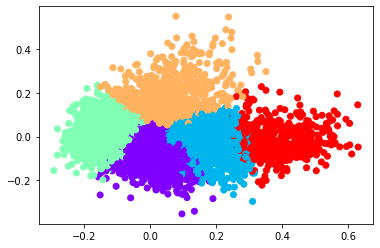

In [28]:
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='rainbow')

Text(0.5, 0.92, 'Review Clustering using K Means')

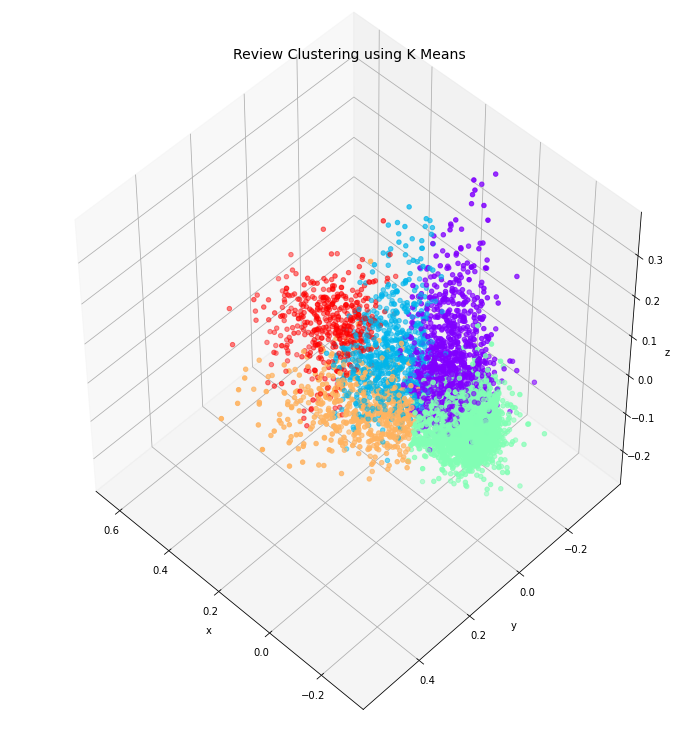

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(data['x'],data['y'],data['z'], c=data['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Review Clustering using K Means", fontsize=14)